# Fish Data Multiple Linear Regression 🐟

#### Importing the required libraries🔄

In [121]:
# importing the required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [122]:
# loading the dataset and checking the first few rows
df = pd.read_csv('Fish.csv')
df.head(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [123]:
# checking the dimensions if the dataset
df.shape

(159, 7)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


Looks like our data types are just the way we would want them to be💯

In [125]:
df.describe(include='all')

,Species,Weight,Length1,Length2,Length3,Height,Width
count,159,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
unique,7,NaN,NaN,NaN,NaN,NaN,NaN
top,Perch,NaN,NaN,NaN,NaN,NaN,NaN
freq,56,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,NaN,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,NaN,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,NaN,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,NaN,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,NaN,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500


In [126]:
df.query('Weight == 0')# this is a possible outlier because weight cannot be zero

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [127]:
# dropping the row with the the outlier 

df = df.drop(labels=40, axis=0)

In [128]:
#confirming that the specific row has been dropped

df.shape

(158, 7)

## Exploratory Data Analysis

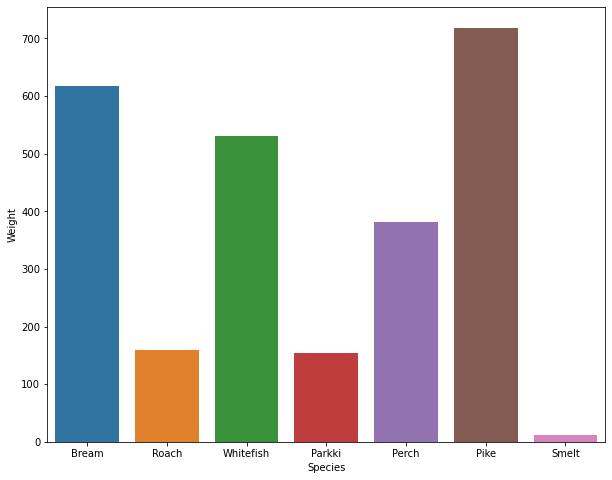

In [129]:
plt.figure(figsize=(10,8))
sns.barplot(x='Species', y='Weight',ci=None, data=df);

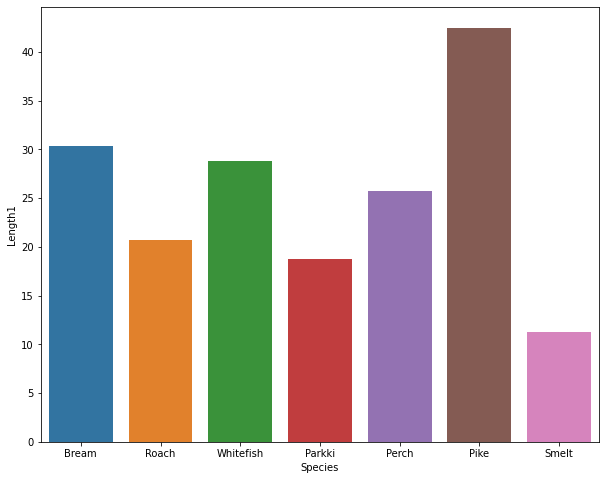

In [130]:
plt.figure(figsize=(10,8))
sns.barplot(x='Species', y='Length1',ci=None, data=df);

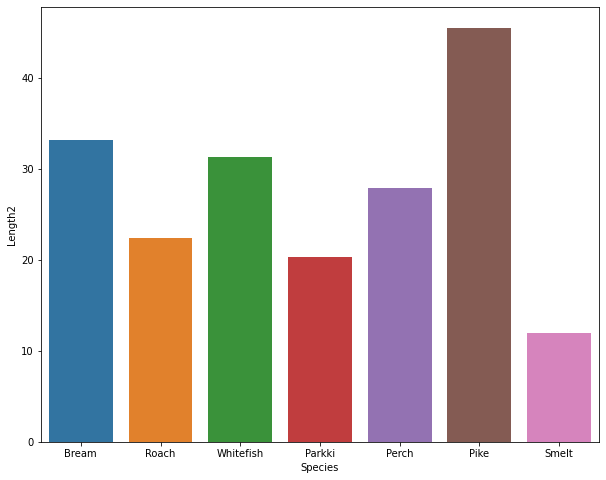

In [131]:
plt.figure(figsize=(10,8))
sns.barplot(x='Species', y='Length2',ci=None, data=df);

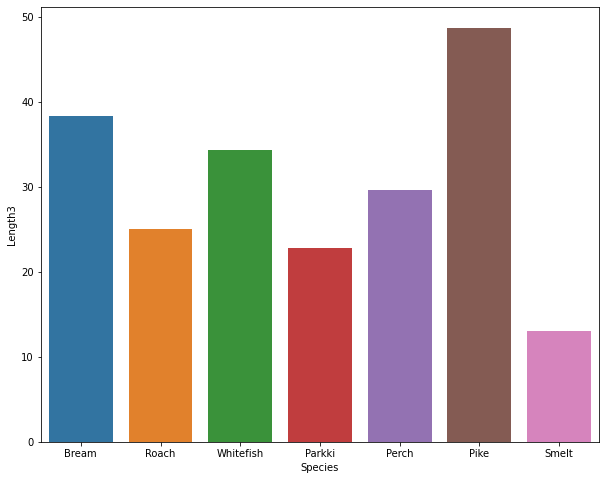

In [132]:
plt.figure(figsize=(10,8))
sns.barplot(x='Species', y='Length3',ci=None, data=df);

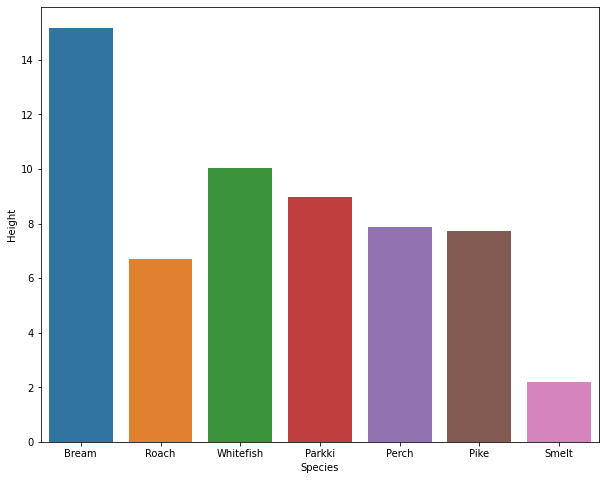

In [133]:
plt.figure(figsize=(10,8))
sns.barplot(x='Species', y='Height',ci=None, data=df);

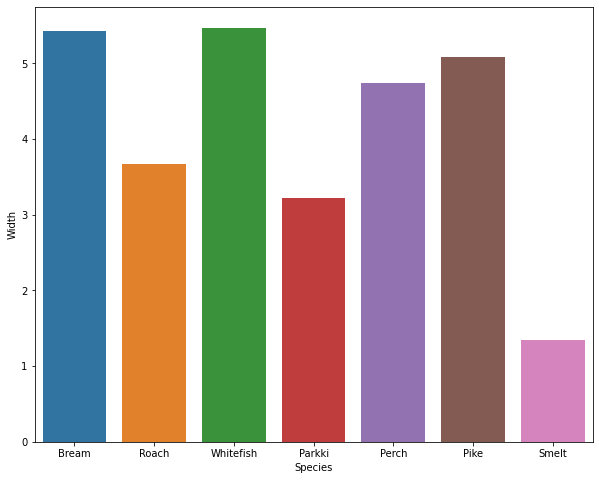

In [134]:
plt.figure(figsize=(10,8))
sns.barplot(x='Species', y='Width',ci=None, data=df);

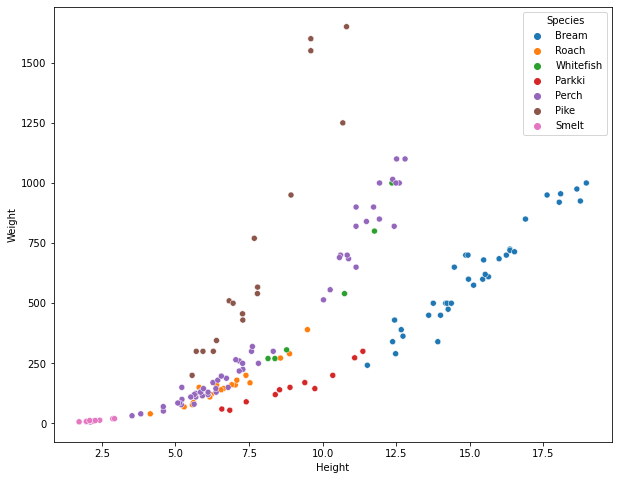

In [135]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Height', y="Weight", hue='Species', data=df);

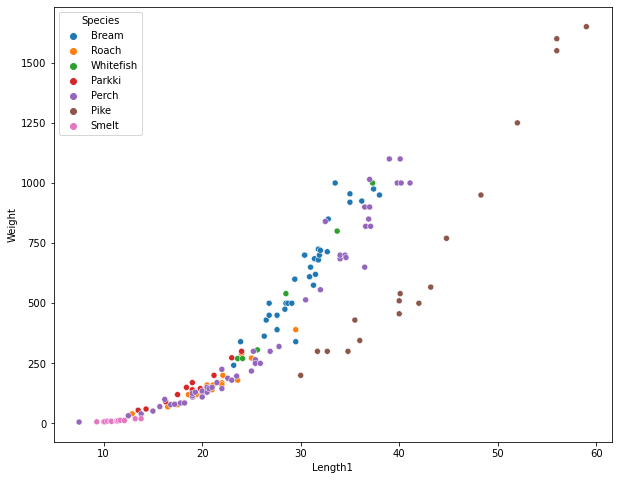

In [136]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Length1', y="Weight", hue='Species', data=df);

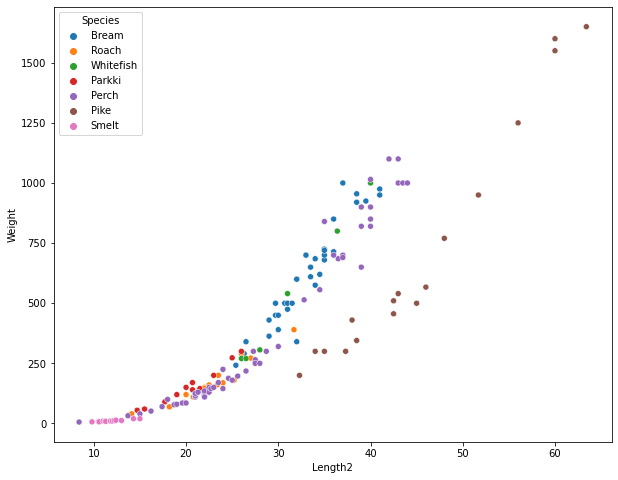

In [137]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Length2', y="Weight", hue='Species', data=df);

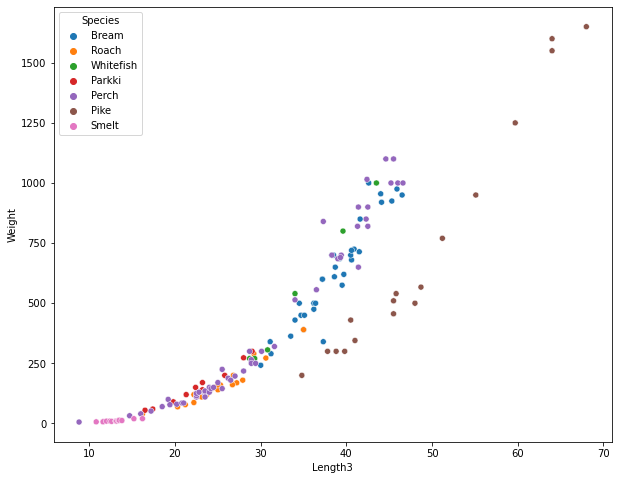

In [138]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Length3', y="Weight", hue='Species', data=df);

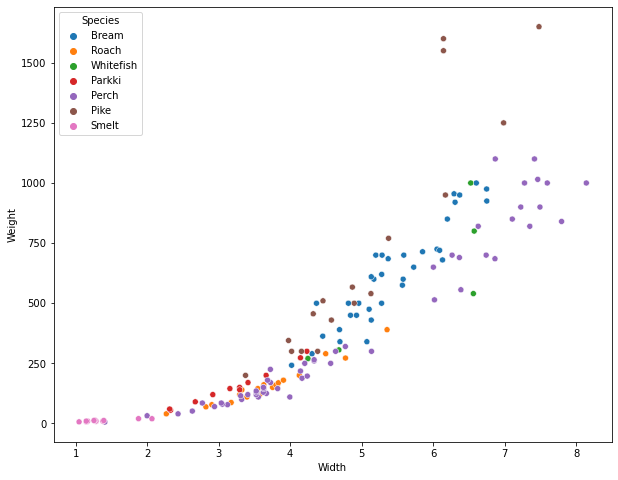

In [139]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Width', y="Weight", hue='Species', data=df);

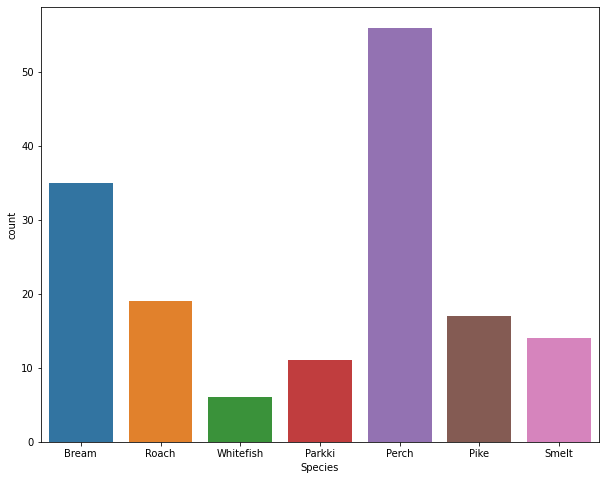

In [140]:
plt.figure(figsize=(10,8))
sns.countplot(x='Species', data=df);

## Modelling 

In [141]:
#Lets do some bit of correlations and see if the data have linear relationships
linear_data = df. drop('Species', axis=1)
linear_data.corr()['Weight'].sort_values(ascending=False)

Weight     1.000000
Length3    0.923090
Length2    0.918603
Length1    0.915719
Width      0.886654
Height     0.723857
Name: Weight, dtype: float64

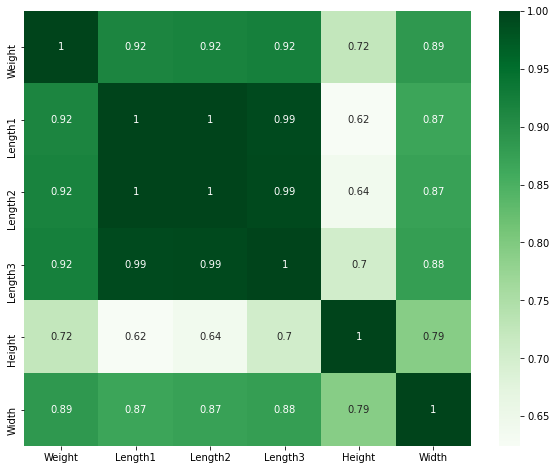

In [142]:
plt.figure(figsize=(10,8))
sns.heatmap(linear_data.corr(), annot=True, cmap='Greens');

In [143]:
# Dealing with categorical variables
y_first = df['Weight']
X = pd.get_dummies(data=df, columns=['Species'])
X_first = X.drop(['Species_Pike','Weight'], axis=1)

In [144]:
X_first.head()

,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Roach,Species_Smelt,Species_Whitefish
0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0
1,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0
2,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0
3,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0
4,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0


In [145]:
# first model 
first_model = sm.OLS(y_first, sm.add_constant(X_first))
first_results = first_model.fit()
print(first_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     193.6
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           3.46e-81
Time:                        06:53:33   Log-Likelihood:                -935.71
No. Observations:                 158   AIC:                             1895.
Df Residuals:                     146   BIC:                             1932.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1121.7372     92.98

### Model Diagnostics 

In [146]:
# second model 
# There seems to have a little bit of multicorrelations contributed by the many strong correlations between variables 

X_second = X_first.drop(['Length2','Length3'], axis=1)
X_second.head()

,Length1,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Roach,Species_Smelt,Species_Whitefish
0,23.2,11.5200,4.0200,1,0,0,0,0,0
1,24.0,12.4800,4.3056,1,0,0,0,0,0
2,23.9,12.3778,4.6961,1,0,0,0,0,0
3,26.3,12.7300,4.4555,1,0,0,0,0,0
4,26.5,12.4440,5.1340,1,0,0,0,0,0


In [147]:
second_model = sm.OLS(y_first, sm.add_constant(X_second))
second_results = second_model.fit()
print(second_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     220.9
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           4.13e-81
Time:                        06:53:34   Log-Likelihood:                -941.78
No. Observations:                 158   AIC:                             1904.
Df Residuals:                     148   BIC:                             1934.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1001.7227     84.51

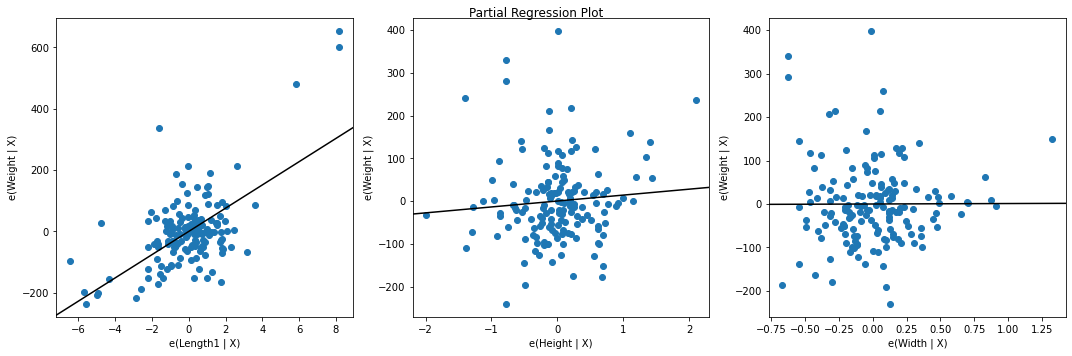

In [148]:
# partial regression plots for the usefulness of the variables 
fig = plt.figure(figsize=(15,5))
sm.graphics.plot_partregress_grid(
    second_results,
    exog_idx=list(X_first[['Length1','Height','Width']].columns.values),
    grid=(1,3),
    fig=fig)
plt.show();


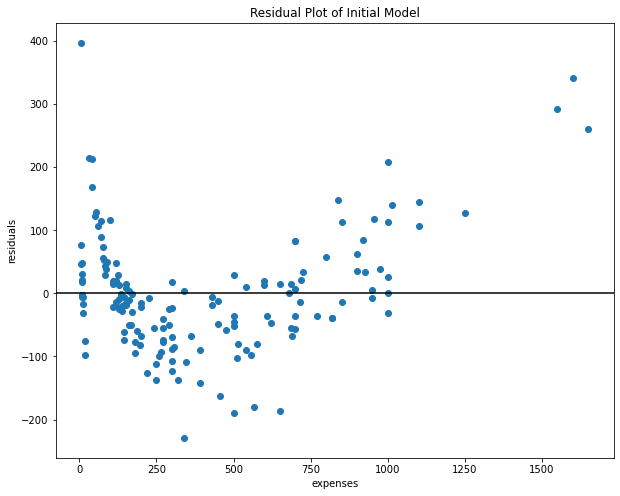

In [149]:
# Testing the linearity and heteroskedasticity assumption
fig, ax = plt.subplots(figsize=(10,8))

ax.scatter(y_first, second_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("expenses")
ax.set_ylabel("residuals")
ax.set_title("Residual Plot of Initial Model");

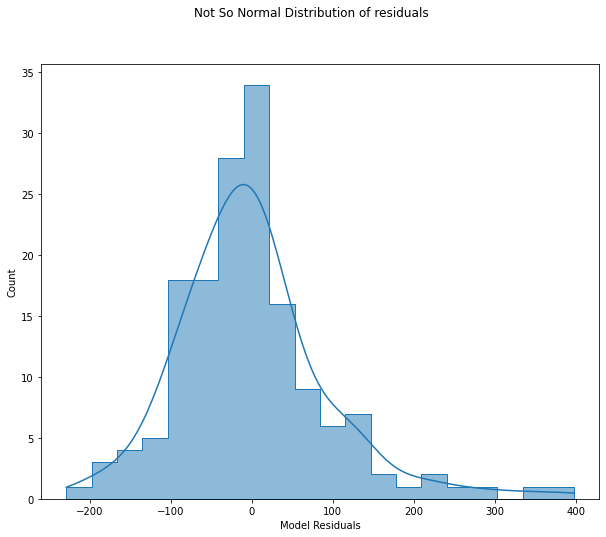

In [150]:
# Normality assumption
fig, ax = plt.subplots(figsize=(10,8))
sns.histplot(second_results.resid, bins=20, element="step", kde=True, ax=ax)
ax.set_xlabel("Model Residuals")
fig.suptitle("Not So Normal Distribution of residuals");

In [151]:
# third model -- drop width

X_third = X_second.drop('Width', axis=1)
third_model = sm.OLS(y_first, sm.add_constant(X_third))
third_results = third_model.fit()
print(third_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     250.2
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           2.53e-82
Time:                        06:53:35   Log-Likelihood:                -941.78
No. Observations:                 158   AIC:                             1902.
Df Residuals:                     149   BIC:                             1929.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1002.5496     82.03

### Model Diagnostics

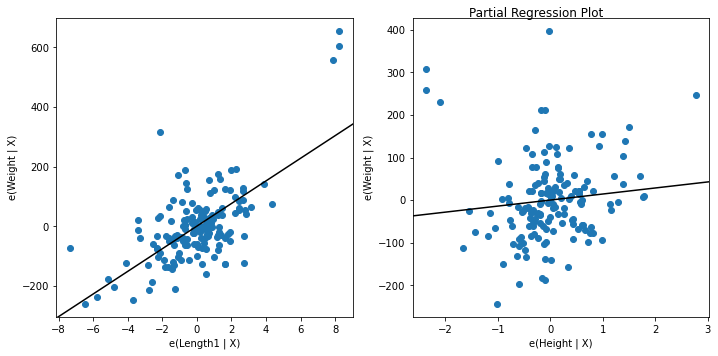

In [152]:
fig = plt.figure(figsize=(15,5))
sm.graphics.plot_partregress_grid(
    third_results,
    exog_idx=list(X_first[['Length1','Height']].columns.values),
    grid=(1,3),
    fig=fig)
plt.show();

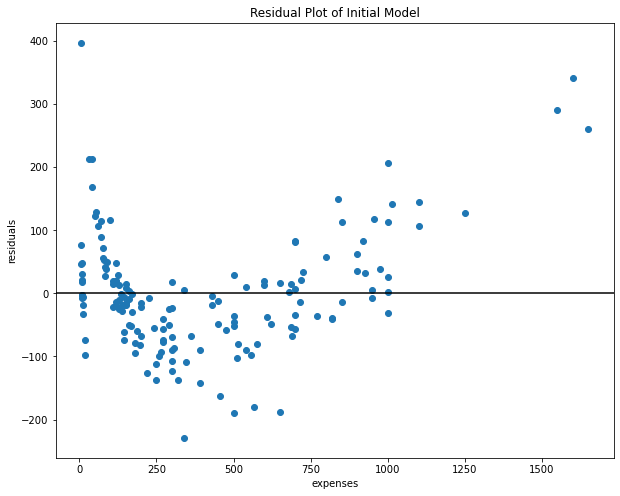

In [153]:
fig, ax = plt.subplots(figsize=(10,8))

ax.scatter(y_first, third_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("expenses")
ax.set_ylabel("residuals")
ax.set_title("Residual Plot of Initial Model");

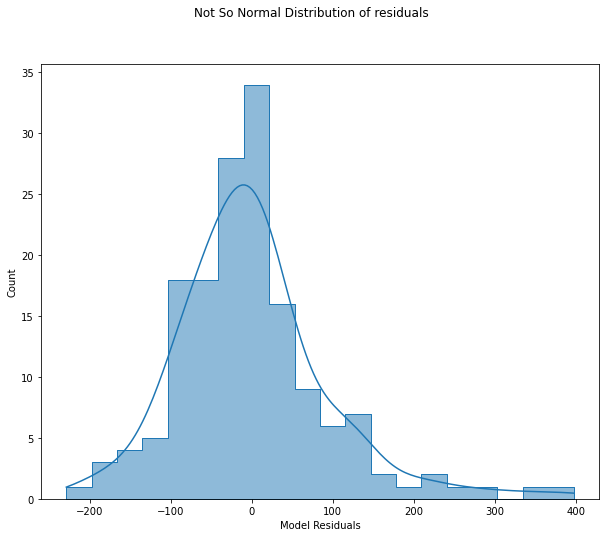

In [154]:
fig, ax = plt.subplots(figsize=(10,8))
sns.histplot(third_results.resid, bins=20, element="step", kde=True, ax=ax)
ax.set_xlabel("Model Residuals")
fig.suptitle("Not So Normal Distribution of residuals");

In [156]:
#  fourth model-- log transform height
y_log = np.log(y_first)
X_third['log_height'] = np.log(X_third['Height'])
X_fourth = X_third.drop('Height', axis=1)
X_fourth.head()

fourth_model = sm.OLS(y_log, sm.add_constant(X_fourth))
fourth_results = fourth_model.fit()
print(fourth_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     2334.
Date:                Wed, 18 Jan 2023   Prob (F-statistic):          2.03e-152
Time:                        06:53:37   Log-Likelihood:                 113.96
No. Observations:                 158   AIC:                            -209.9
Df Residuals:                     149   BIC:                            -182.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.8026      0.08

### Model Diagnostics

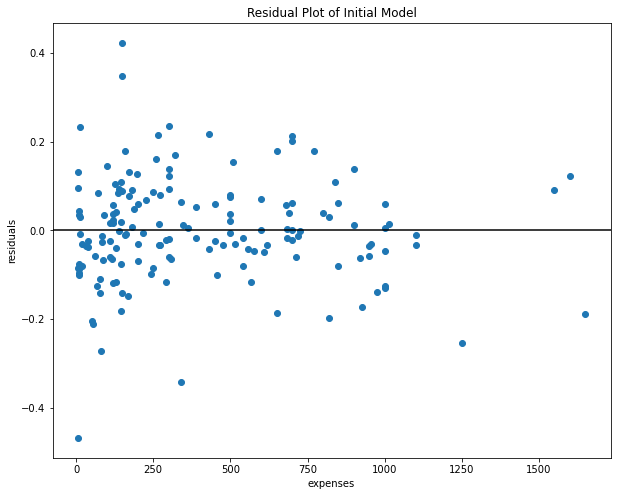

In [157]:
fig, ax = plt.subplots(figsize=(10,8))

ax.scatter(y_first, fourth_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("expenses")
ax.set_ylabel("residuals")
ax.set_title("Residual Plot of Initial Model");

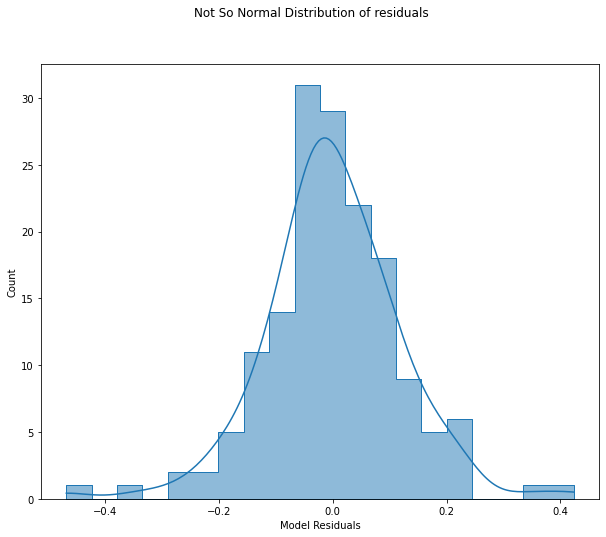

In [158]:
fig, ax = plt.subplots(figsize=(10,8))
sns.histplot(fourth_results.resid, bins=20, element="step", kde=True, ax=ax)
ax.set_xlabel("Model Residuals")
fig.suptitle("Not So Normal Distribution of residuals");

In [159]:
y_pred_fourth = fourth_results.predict(sm.add_constant(X_fourth))

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100
mape(y_log, y_pred_fourth)

1.8638501195636124

In [161]:
np.exp(1.8638501195636124)

6.448516598081857